<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/FB_Prophet_Future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flask-ngrok

In [2]:
from flask import Flask
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, Response

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount = True)
data = pd.read_csv("/content/drive/My Drive/my_data/Seattle_Short.csv")

@app.route("/")
def work():
  return Response(data.to_json(orient="records"), mimetype='application/json')
app.run()

Mounted at /content/drive
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://da7ea65242f5.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [10/Aug/2021 09:36:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Aug/2021 09:36:22] "GET / HTTP/1.1" 200 -


In [3]:
import pandas as pd
from matplotlib import pyplot

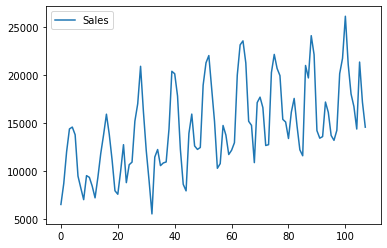

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

df = pd.read_csv(path, header=0)
# we ask pandas to visualize dataset
df.plot()
pyplot.show()
# we ask pandas to print the first data rows
df.head()

In [5]:
df.shape

(108, 2)

In [6]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [7]:
import fbprophet
from fbprophet import Prophet
import numpy as np
from fbprophet.plot import add_changepoints_to_plot
from pandas import read_csv

In [8]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [9]:
df_new = df.head(90)
df_new

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
85,1967-02,11608
86,1967-03,20985
87,1967-04,19692
88,1967-05,24081


In [11]:
m = Prophet()
m.fit(df_new)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=6,freq='M')
future.tail(15)

,ds
81,1966-10-01
82,1966-11-01
83,1966-12-01
84,1967-01-01
85,1967-02-01
86,1967-03-01
87,1967-04-01
88,1967-05-01
89,1967-06-01
90,1967-06-30


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,1967-07-31,13450.810287,11891.341775,14968.485239
92,1967-08-31,9341.505513,7796.986799,10929.278896
93,1967-09-30,17261.467805,15740.048954,18708.542612
94,1967-10-31,21364.790235,19794.878196,22789.053360
95,1967-11-30,15478.189226,14041.074094,16977.560342


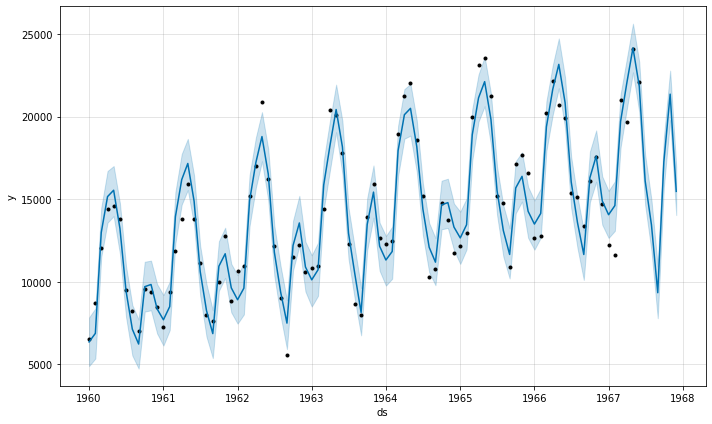

In [14]:
fig1 = m.plot(forecast)

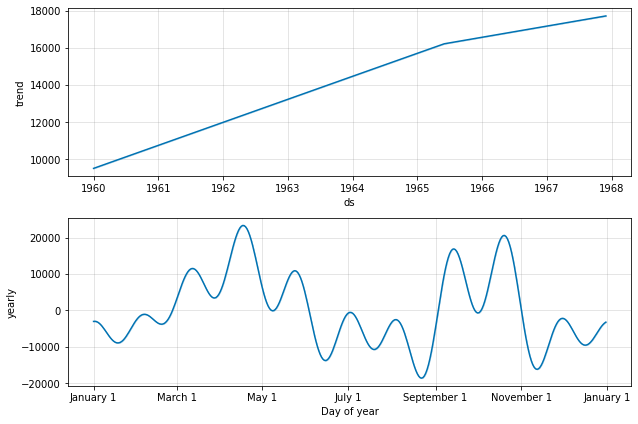

In [15]:
fig2 = m.plot_components(forecast)

In [16]:
!pip install notebook

In [17]:
!pip install ipywidgets

In [18]:
from fbprophet.plot import plot_plotly, plot_components_plotly


plot_plotly(m, forecast)

In [19]:
plot_components_plotly(m, forecast)